# 1. Global alignment

## 1.1 Initialization

### 1.1.1 first cell


$$
    \begin{align*}
    H(i, 0) &= 0 \\ 
    E(i, 0) &= 0 \\
    F(i, 0) &= 0
    \end{align*}
$$

### 1.1.2 first col

$$
\begin{align*}
\ H(i, 0) &= -gap_{init}-i*gap_{ext} \\ 
\ E(i, 0) &= -\infty \\
\ F(i, 0) &= -gap_{init}-i*gap_{ext}
\end{align*}
$$

### 1.1.3 first row

\begin{align*}
\ H(0, j) &= -gap_{init}-j*gap_{ext} \\ 
\ E(0, j) &= -gap_{init}-i*gap_{ext} \\
\ F(0, j) &= -\infty
\end{align*}


## 1.1 Recurrence

\begin{align*}
\ H(i, j) &= \max\{(H(i, j)+S(i, j),\ E(i, j),\ F(i,j))\} \\ 
\ E(i, j) &= \max\{H(i-1, j)-gap_{init},\ E(i-1, j)-gap_{ext}\} \\
\ F(i, j) &= \max\{H(i, j-1)-gap_{init},\ F(i, j-1)-gap_{ext}\}
\end{align*}


In [3]:
#import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

def S(x, y, m0, m1):
    if(x == y): return m0
    else: return m1
def global_alignment(target, query, m0 = 1, m1 = -4, gap_op = 6, gap_ex = 1):
    LIMIT = -99
    #H[0][0] = [0, 0, 0]
    H = numpy.zeros((len(query)+1, len(target)+1), dtype=int)
    E = numpy.zeros((len(query)+1, len(target)+1), dtype=int)
    F = numpy.zeros((len(query)+1, len(target)+1), dtype=int)
    #print(M)
    for i in range(1, len(query)+1): 
        H[i][0] = F[i][0] = -gap_op-i*gap_ex
        E[i][0] = LIMIT
    for j in range(1, len(target)+1): 
        H[0][j] = E[0][j] = -gap_op-j*gap_ex
        F[0][j] = LIMIT
    for j in range(1, len(target)+1):
        for i in range(1, len(query)+1):
            E[i][j] = max(H[i-1][j] -gap_op, E[i-1][j]-gap_ex)
            F[i][j] = max(H[i][j-1] -gap_op, F[i][j-1]-gap_ex)
            H[i][j] = max(H[i-1][j-1]+S(query[i-1], target[j-1], m0, m1), E[i][j], F[i][j])
    #df1 = pd.DataFrame([['{} {} {}'.format(M[i][j][0], M[i][j][1], M[i][j][2]) for j in range(len(target)+1)] for i in range(len(query)+1)], index=list('-'+query), columns=list('-'+target))
    #df1 = pd.DataFrame([[(M[i][j][0], M[i][j][1], M[i][j][2]) for j in range(len(target)+1)] for i in range(len(query)+1)], index=list('-'+query), columns=list('-'+target))
    #df = pd.DataFrame([[M[i][j][0]  for j in range(len(target)+1)] for i in range(len(query)+1)], index=list('-'+query), columns=list('-'+target))
    

    ax = plt.gca()
    ax.xaxis.tick_top()
    ax = sns.heatmap(H, annot=True, cbar=False, yticklabels = list('-'+query), xticklabels = list('-'+target), ax=ax)

    print(H)
    print(E)
    print(F)
def local_alignment(target, query, m0 = 1, m1 = -4, gap_op = 6, gap_ex = 1):
    LIMIT = -99
    #H[0][0] = [0, 0, 0]
    H = numpy.zeros((len(query)+1, len(target)+1), dtype=int)
    E = numpy.zeros((len(query)+1, len(target)+1), dtype=int)
    F = numpy.zeros((len(query)+1, len(target)+1), dtype=int)
    #print(M)
    '''
    for i in range(1, len(query)+1): 
        H[i][0] = F[i][0] = -gap_op-i*gap_ex
        E[i][0] = LIMIT
    for j in range(1, len(target)+1): 
        H[0][j] = E[0][j] = -gap_op-j*gap_ex
        F[0][j] = LIMIT
    '''
    for j in range(1, len(target)+1):
        for i in range(1, len(query)+1):
            E[i][j] = max(0, H[i-1][j] -gap_op, E[i-1][j]-gap_ex)
            F[i][j] = max(0, H[i][j-1] -gap_op, F[i][j-1]-gap_ex)
            H[i][j] = max(0, H[i-1][j-1]+S(query[i-1], target[j-1], m0, m1), E[i][j], F[i][j])
    #df1 = pd.DataFrame([['{} {} {}'.format(M[i][j][0], M[i][j][1], M[i][j][2]) for j in range(len(target)+1)] for i in range(len(query)+1)], index=list('-'+query), columns=list('-'+target))
    #df1 = pd.DataFrame([[(M[i][j][0], M[i][j][1], M[i][j][2]) for j in range(len(target)+1)] for i in range(len(query)+1)], index=list('-'+query), columns=list('-'+target))
    #df = pd.DataFrame([[M[i][j][0]  for j in range(len(target)+1)] for i in range(len(query)+1)], index=list('-'+query), columns=list('-'+target))
    

    ax = plt.gca()
    ax.xaxis.tick_top()
    ax = sns.heatmap(H, annot=True, cbar=False, yticklabels = list('-'+query), xticklabels = list('-'+target), ax=ax)

    #print(H)
    #print(E)
    #print(F)

    
    

[[  0  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16]
 [ -7  -4  -9  -7 -11 -12 -13 -14 -15 -16 -17]
 [ -8  -6  -3  -9  -6 -11 -11 -13 -14 -14 -16]
 [ -9 -10  -9  -2  -8  -9 -10 -11 -12 -13 -14]
 [-10  -8  -9  -8  -1  -7  -8  -9 -10 -11 -12]
 [-11 -12 -11  -9  -7   0  -6  -7  -8  -9 -10]
 [-12 -10 -11 -10  -8  -6   1  -5  -6  -7  -8]
 [-13 -14 -13 -11  -9  -7  -5  -3  -9 -10  -6]]
[[  0  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16]
 [-99  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17]
 [-99  -9 -10 -11 -12 -13 -14 -15 -16 -17 -18]
 [-99 -10  -9 -12 -12 -14 -15 -16 -17 -18 -19]
 [-99 -11 -10  -8 -13 -15 -16 -17 -18 -19 -20]
 [-99 -12 -11  -9  -7 -13 -14 -15 -16 -17 -18]
 [-99 -13 -12 -10  -8  -6 -12 -13 -14 -15 -16]
 [-99 -14 -13 -11  -9  -7  -5 -11 -12 -13 -14]]
[[  0 -99 -99 -99 -99 -99 -99 -99 -99 -99 -99]
 [ -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17]
 [ -8  -9 -10  -9 -10 -11 -12 -13 -14 -15 -16]
 [ -9 -10 -11 -12  -8  -9 -10 -11 -12 -13 -14]
 [-10 -11 -12 -13 -14  -7  -8  -9 -10 -11 -12]
 [-11 -12 -

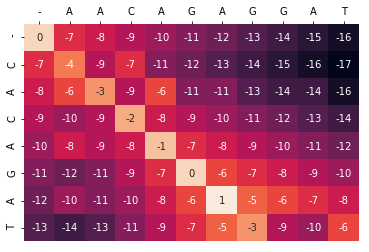

In [4]:
target = 'AACAGAGGAT'
query = 'CACAGAT'
global_alignment(target, query)

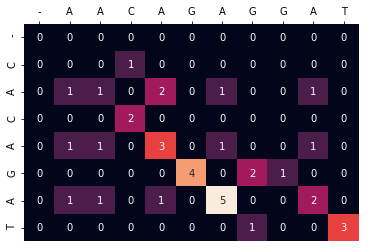

In [5]:
local_alignment(target, query)